In [65]:
import pandas as pd
import numpy as np

# Read cleaned CSV
df = pd.read_csv('us_stock_valuation_clean.csv')

# Keep a copy of the raw rows (optional)
df_raw = df.copy()

# Parse dates and ensure numeric price
df['Price Dates'] = pd.to_datetime(df['Price Dates'], dayfirst=True, errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Calendar Year'] = pd.to_numeric(df['Calendar Year'], errors='coerce').astype('Int64')

# Drop rows without a valid date or price
df = df.dropna(subset=['Price Dates', 'Price', 'Calendar Year']).copy()

# Select the last observed snapshot within each (Ticker, Calendar Year)
# This picks the row with the maximum Price Dates per group
idx_last = df.groupby(['Ticker', 'Calendar Year'])['Price Dates'].idxmax()
df_annual = (
    df.loc[idx_last]
      .sort_values(['Ticker', 'Calendar Year'])
      .reset_index(drop=True)
)

# Use the annual "last observed" dataset as df for the rest of the notebook
df = df_annual

df.head(15)

,Ticker,Company Name,Sector,Industry,Beta,Calendar Year,Period,Filing Date,Revenue,Cost Of Revenue,...,Interest Coverage Ratio,Price Dates,Price,Market Cap,P/E Ratio,P/S Ratio,Risk Free Rate,Equity Risk Premium,WACC,Avg Market Return
0,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2014,FY,22/12/2014,6.981000e+09,NaN,...,7.35,2015-08-24,34.68,11548439552,23.28,1.65,0.020,0.060,0.073,0.08
1,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2015,FY,21/12/2015,4.038000e+09,1.997000e+09,...,7.91,2016-08-22,47.58,15844140032,39.65,3.92,0.015,0.060,0.079,0.08
2,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2016,FY,20/12/2016,4.202000e+09,2.005000e+09,...,8.54,2017-08-22,62.96,20524959744,44.65,4.88,0.022,0.060,0.078,0.08
3,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2017,FY,21/12/2017,4.472000e+09,2.063000e+09,...,10.65,2018-08-23,65.69,21152180224,30.99,4.73,0.028,0.050,0.078,0.08
4,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2018,FY,20/12/2018,4.914000e+09,2.227000e+09,...,12.37,2019-08-22,71.74,23028539392,73.20,4.69,0.016,0.060,0.078,0.08
5,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2019,FY,19/12/2019,5.163000e+09,2.358000e+09,...,12.72,2020-08-20,97.78,30702919680,28.67,5.95,0.007,0.070,0.080,0.08
6,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2020,FY,18/12/2020,5.339000e+09,2.502000e+09,...,10.85,2021-08-20,168.13,51952168960,72.16,9.73,0.013,0.070,0.081,0.08
7,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2021,FY,17/12/2021,6.319000e+09,2.912000e+09,...,16.63,2022-08-19,137.62,41836478464,34.58,6.62,0.030,0.050,0.079,0.08
8,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2022,FY,21/12/2022,6.848000e+09,3.126000e+09,...,19.26,2023-08-23,119.13,35619868672,28.43,5.20,0.042,0.040,0.078,0.08
9,A,Agilent Technologies Inc.,Healthcare,Medical - Diagnostics & Research,1.05,2023,FY,20/12/2023,6.833000e+09,3.368000e+09,...,14.21,2024-04-23,139.20,40924798976,32.99,5.99,0.046,0.034,0.079,0.08


In [ ]:
assert not df.duplicated(['Ticker', 'Calendar Year']).any(), "Duplicate Ticker–Year found."

# Index the DataFrame by Ticker and Calendar Year
df = df.sort_values(['Ticker', 'Calendar Year'])
df_indexed = df.set_index(['Ticker', 'Calendar Year']).sort_index()

# Quick peek
df_indexed.head(20)

Company Name       Sector  \
Ticker Calendar Year                                              
A      2014              Agilent Technologies Inc.   Healthcare   
       2015              Agilent Technologies Inc.   Healthcare   
       2016              Agilent Technologies Inc.   Healthcare   
       2017              Agilent Technologies Inc.   Healthcare   
       2018              Agilent Technologies Inc.   Healthcare   
       2019              Agilent Technologies Inc.   Healthcare   
       2020              Agilent Technologies Inc.   Healthcare   
       2021              Agilent Technologies Inc.   Healthcare   
       2022              Agilent Technologies Inc.   Healthcare   
       2023              Agilent Technologies Inc.   Healthcare   
AAL    2014           American Airlines Group Inc.  Industrials   
       2015           American Airlines Group Inc.  Industrials   
       2016           American Airlines Group Inc.  Industrials   
       2017           American Airlines Group Inc.  Industrials   
       2018           American Airlines Group Inc.  Industrials   
       2019           American Airlines Group Inc.  Industrials   
       2020           American Airlines Group Inc.  Industrials   
       2021           American Airlines Group Inc.  Industrials   
       2022           American Airlines Group Inc.  Industrials   
       2023           American Airlines Group Inc.  Industrials   

                                               Industry  Beta Period  \
Ticker Calendar Year                                                   
A      2014            Medical - Diagnostics & Research  1.05     FY   
       2015            Medical - Diagnostics & Research  1.05     FY   
       2016            Medical - Diagnostics & Research  1.05     FY   
       2017            Medical - Diagnostics & Research  1.05     FY   
       2018            Medical - Diagnostics & Research  1.05     FY   
       2019            Medical - Diagnostics & Research  1.05     FY   
       2020            Medical - Diagnostics & Research  1.05     FY   
       2021            Medical - Diagnostics & Research  1.05     FY   
       2022            Medical - Diagnostics & Research  1.05     FY   
       2023            Medical - Diagnostics & Research  1.05     FY   
AAL    2014           Airlines, Airports & Air Services  1.45     FY   
       2015           Airlines, Airports & Air Services  1.45     FY   
       2016           Airlines, Airports & Air Services  1.45     FY   
       2017           Airlines, Airports & Air Services  1.45     FY   
       2018           Airlines, Airports & Air Services  1.45     FY   
       2019           Airlines, Airports & Air Services  1.45     FY   
       2020           Airlines, Airports & Air Services  1.45     FY   
       2021           Airlines, Airports & Air Services  1.45     FY   
       2022           Airlines, Airports & Air Services  1.45     FY   
       2023           Airlines, Airports & Air Services  1.45     FY   

                     Filing Date       Revenue  Cost Of Revenue  Net Income  \
Ticker Calendar Year                                                          
A      2014           22/12/2014  6.981000e+09              NaN   497000000   
       2015           21/12/2015  4.038000e+09     1.997000e+09   398000000   
       2016           20/12/2016  4.202000e+09     2.005000e+09   460000000   
       2017           21/12/2017  4.472000e+09     2.063000e+09   684000000   
       2018           20/12/2018  4.914000e+09     2.227000e+09   316000000   
       2019           19/12/2019  5.163000e+09     2.358000e+09  1071000000   
       2020           18/12/2020  5.339000e+09     2.502000e+09   719000000   
       2021           17/12/2021  6.319000e+09     2.912000e+09  1210000000   
       2022           21/12/2022  6.848000e+09     3.126000e+09  1254000000   
       2023           20/12/2023  6.833000e+09     3.368000e+09  1240000000   
AAL    2014           25/02/20

In [67]:
# Derive missing ratios where possible from other columns in the same row
def derive_same_row_inplace(df: pd.DataFrame) -> pd.DataFrame:
    # helper: elementwise safe divide
    def safe_div(num, den):
        return np.where((pd.notna(num)) & (pd.notna(den)) & (den != 0), num / den, np.nan)

    # ---- Exact identities (row-local) ----
    if {"Total Debt","Long-Term Debt","Short-Term Debt"}.issubset(df.columns):
        m = df["Total Debt"].isna()
        df.loc[m, "Total Debt"] = df.loc[m, "Long-Term Debt"] + df.loc[m, "Short-Term Debt"]

    if {"Net Cash","Cash And Short Term Investments","Total Debt"}.issubset(df.columns):
        m = df["Net Cash"].isna()
        df.loc[m, "Net Cash"] = df.loc[m, "Cash And Short Term Investments"] - df.loc[m, "Total Debt"]

    if {"Free Cash Flow","Operating Cash Flow","Capital Expenditure"}.issubset(df.columns):
        m = df["Free Cash Flow"].isna()
        df.loc[m, "Free Cash Flow"] = df.loc[m, "Operating Cash Flow"] - df.loc[m, "Capital Expenditure"]

    # ---- Margins (from row numerators/denominators) ----
    if {"Operating Profit Margin","Operating Income","Revenue"}.issubset(df.columns):
        m = df["Operating Profit Margin"].isna()
        df.loc[m, "Operating Profit Margin"] = safe_div(df.loc[m, "Operating Income"], df.loc[m, "Revenue"])

    if {"Gross Profit Margin","Revenue","Cost Of Revenue"}.issubset(df.columns):
        m = df["Gross Profit Margin"].isna()
        gp = df.loc[m, "Revenue"] - df.loc[m, "Cost Of Revenue"]
        df.loc[m, "Gross Profit Margin"] = safe_div(gp, df.loc[m, "Revenue"])

    # ---- Returns (only if inputs exist on the same row) ----
    if {"Return On Assets","Net Income","Total Assets"}.issubset(df.columns):
        m = df["Return On Assets"].isna()
        df.loc[m, "Return On Assets"] = safe_div(df.loc[m, "Net Income"], df.loc[m, "Total Assets"])

    if {"Return On Equity","Net Income","Total Assets","Total Liabilities"}.issubset(df.columns):
        m = df["Return On Equity"].isna()
        equity = df.loc[m, "Total Assets"] - df.loc[m, "Total Liabilities"]
        df.loc[m, "Return On Equity"] = safe_div(df.loc[m, "Net Income"], equity)

    if {"Return On Invested Capital","NOPAT","Invested Capital"}.issubset(df.columns):
        m = df["Return On Invested Capital"].isna()
        df.loc[m, "Return On Invested Capital"] = safe_div(df.loc[m, "NOPAT"], df.loc[m, "Invested Capital"])

    # ---- Coverage ----
    if "Interest Coverage Ratio" in df.columns:
        # Prefer EBIT if present, else Operating Income
        if {"EBIT","Interest Expense"}.issubset(df.columns):
            m = df["Interest Coverage Ratio"].isna()
            df.loc[m, "Interest Coverage Ratio"] = safe_div(df.loc[m, "EBIT"], df.loc[m, "Interest Expense"])
        elif {"Operating Income","Interest Expense"}.issubset(df.columns):
            m = df["Interest Coverage Ratio"].isna()
            df.loc[m, "Interest Coverage Ratio"] = safe_div(df.loc[m, "Operating Income"], df.loc[m, "Interest Expense"])

    # ---- Valuation ratios (row-local equivalents) ----
    if "P/E Ratio" in df.columns:
        if {"Price","EPS"}.issubset(df.columns):
            m = df["P/E Ratio"].isna()
            df.loc[m, "P/E Ratio"] = safe_div(df.loc[m, "Price"], df.loc[m, "EPS"])
        if {"Market Cap","Net Income"}.issubset(df.columns):
            m = df["P/E Ratio"].isna()
            df.loc[m, "P/E Ratio"] = safe_div(df.loc[m, "Market Cap"], df.loc[m, "Net Income"])

    if "P/S Ratio" in df.columns:
        if {"Price","Revenue Per Share"}.issubset(df.columns):
            m = df["P/S Ratio"].isna()
            df.loc[m, "P/S Ratio"] = safe_div(df.loc[m, "Price"], df.loc[m, "Revenue Per Share"])
        if {"Market Cap","Revenue"}.issubset(df.columns):
            m = df["P/S Ratio"].isna()
            df.loc[m, "P/S Ratio"] = safe_div(df.loc[m, "Market Cap"], df.loc[m, "Revenue"])

    # ---- Revenue Per Share (handy fallback) ----
    if {"Revenue Per Share","Price","P/S Ratio"}.issubset(df.columns):
        m = df["Revenue Per Share"].isna()
        df.loc[m, "Revenue Per Share"] = safe_div(df.loc[m, "Price"], df.loc[m, "P/S Ratio"])

    return df
df = derive_same_row_inplace(df)
missing = df.isnull().sum()
print(missing[missing > 0].to_string())


Revenue                            1
Cost Of Revenue                    3
Total Current Assets               5
Total Assets                       5
Total Current Liabilities          5
Total Liabilities                  5
Long-Term Debt                     4
Short-Term Debt                    4
Total Debt                         4
Depreciation and Amortization      2
Operating Income                   2
Operating Cash Flow                3
Capital Expenditure                2
Cash And Short Term Investments    5
Net Cash                           5
Free Cash Flow                     2
Stock Based Compensation           3
Dividends Paid                     2
Common Stock                       4
Preferred Stock                    4
Retained Earnings                  4
Return On Invested Capital         5
Gross Profit Margin                4
Operating Profit Margin            3
Interest Coverage Ratio            4
Risk Free Rate                     9
Equity Risk Premium                9
W

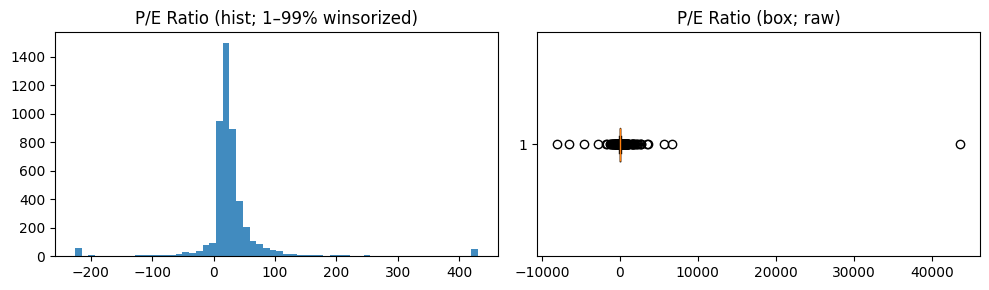

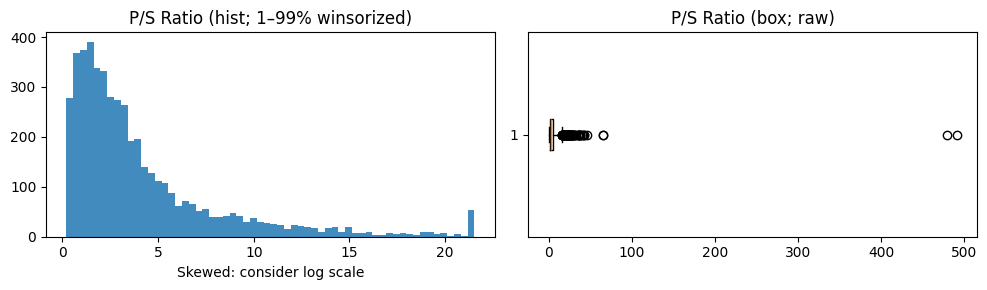

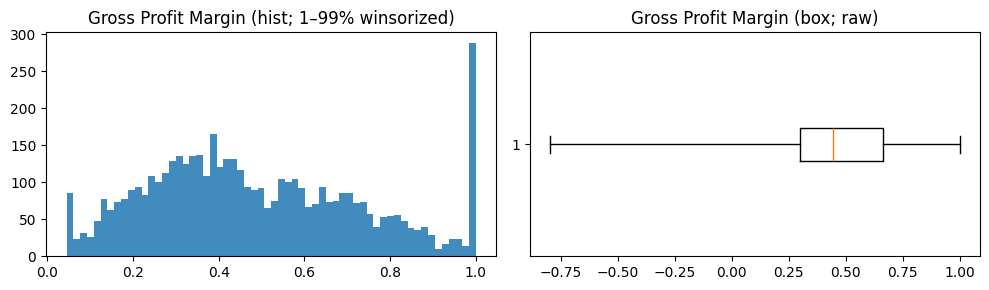

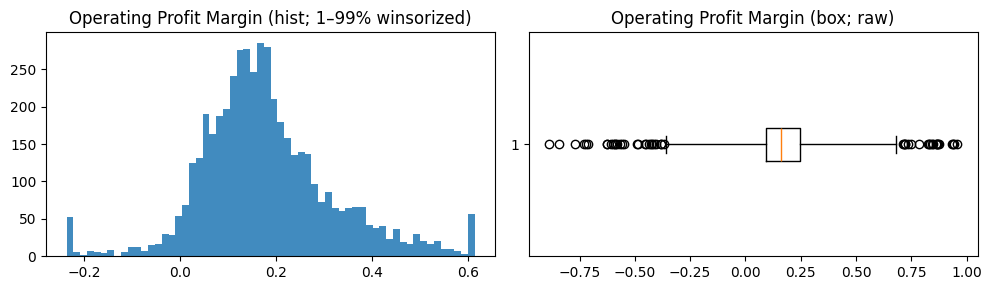

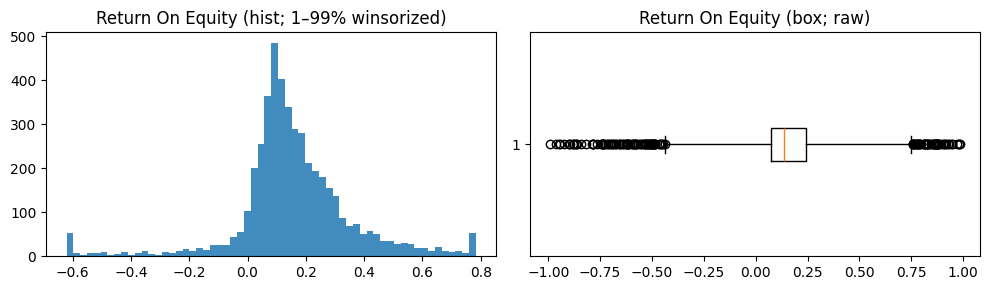

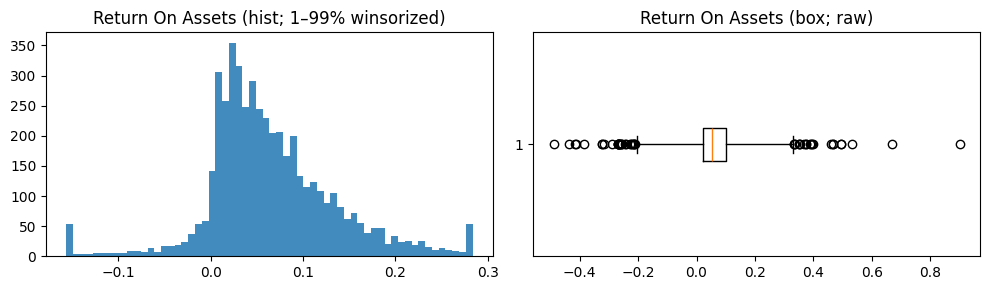

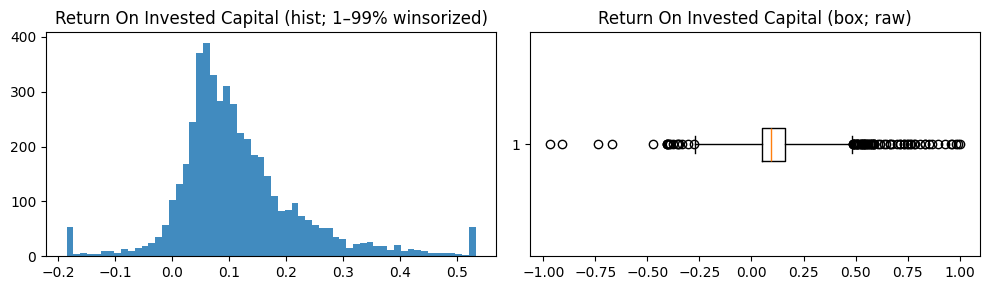

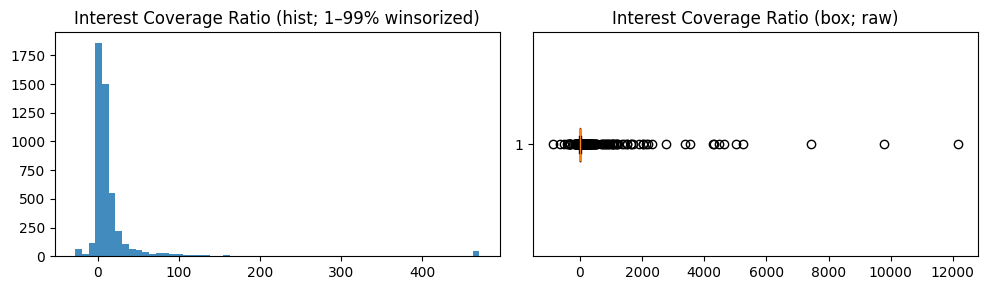

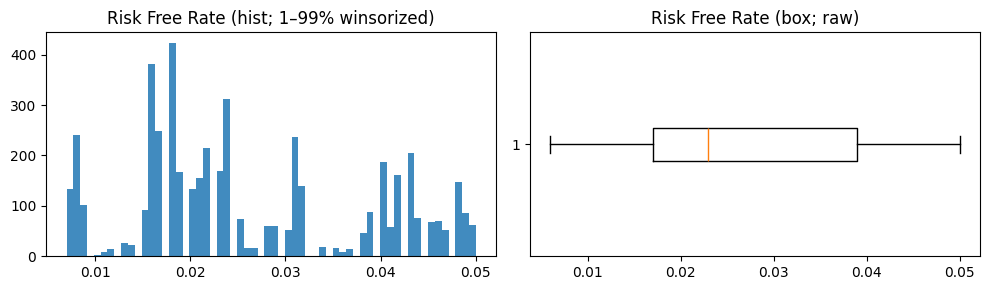

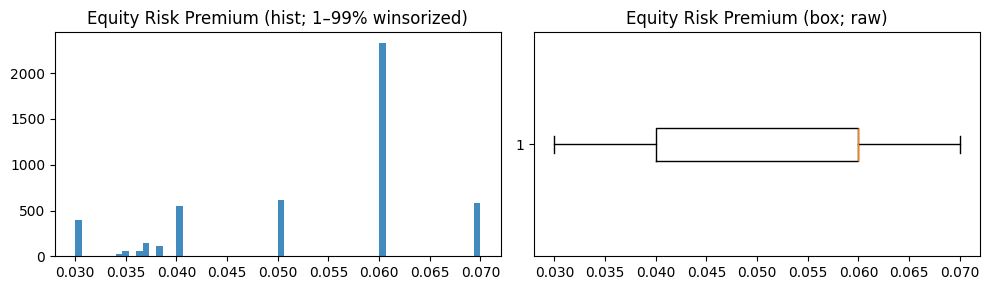

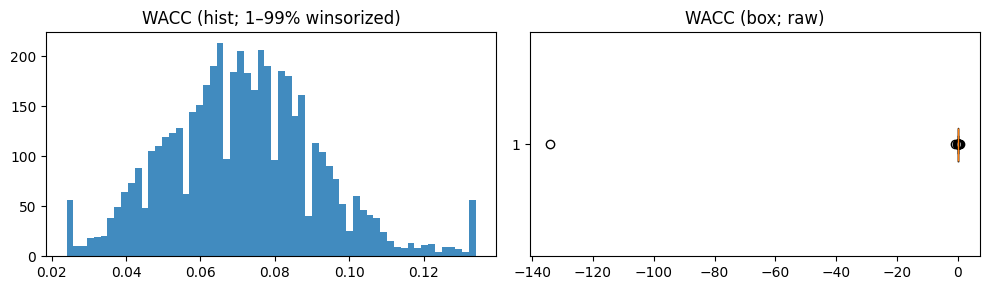

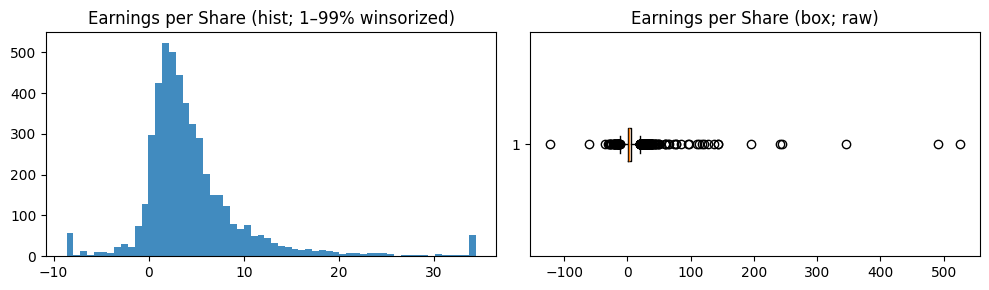

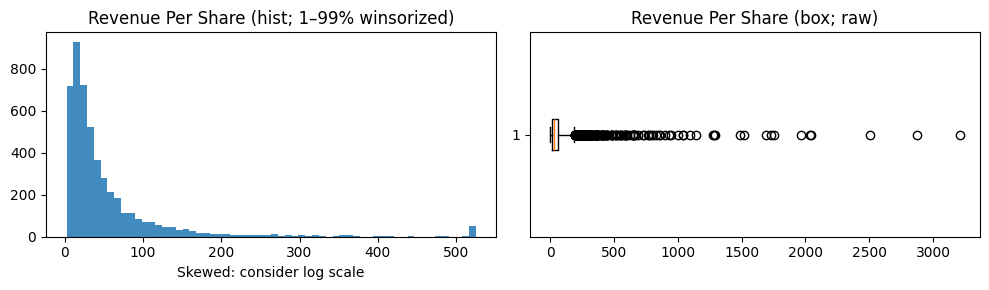

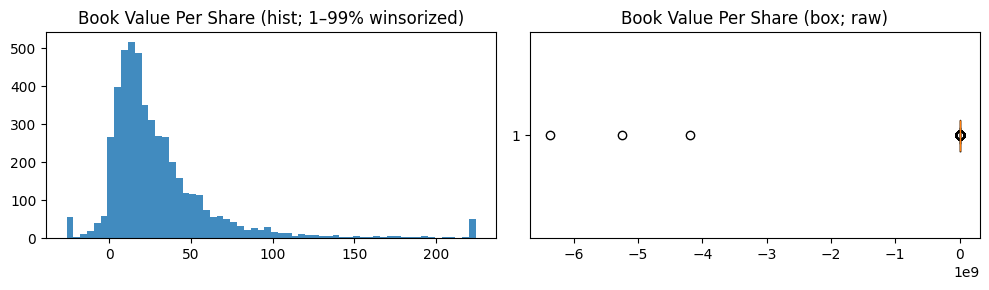

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use the MultiIndex view if available; else build it
if 'df_indexed' in globals():
    D = df_indexed.copy()
else:
    D = df.set_index(['Ticker', 'Calendar Year']).sort_index()

# Columns to analyze (filter to those present)
ratio_cols = [
    'P/E Ratio','P/S Ratio','Gross Profit Margin','Operating Profit Margin',
    'Return On Equity','Return On Assets','Return On Invested Capital',
    'Interest Coverage Ratio','Risk Free Rate','Equity Risk Premium','WACC'
]
per_share = ['Earnings per Share','Revenue Per Share','Book Value Per Share']
time_spike = ['Price','Market Cap','Revenue','Net Income','Operating Income',
              'Operating Cash Flow','Capital Expenditure','Free Cash Flow']

def present(cols): return [c for c in cols if c in D.columns]
ratio_cols, per_share, time_spike = map(present, [ratio_cols, per_share, time_spike])

# --- helper to clean only for plotting (no data changes) ---
RATIO_01 = {'Gross Profit Margin','Operating Profit Margin','Return On Equity',
            'Return On Assets','Return On Invested Capital'}

def _series_for_plot(df_like, col):
    s = pd.to_numeric(df_like[col], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()
    if col in RATIO_01:
        if (s > 1.5).mean() > 0.01:   # values look like percentages -> convert
            s = s.where(s <= 1.5, s / 100.0)
        s = s[(s >= -1.0) & (s <= 1.0)]
    return s

def winsorize_series(s: pd.Series, lo=0.01, hi=0.99) -> pd.Series:
    ql, qh = s.quantile([lo, hi])
    return s.clip(lower=ql, upper=qh)

# 1) Univariate: histogram (winsorized) + boxplot (raw)
def plot_univariate(cols, bins=60, lo=0.01, hi=0.99):
    for c in cols:
        s = _series_for_plot(D, c)
        if s.empty:
            continue
        s_win = winsorize_series(s, lo=lo, hi=hi)
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))
        axes[0].hist(s_win, bins=bins, alpha=0.85)
        axes[0].set_title(f'{c} (hist; {int(lo*100)}–{int(hi*100)}% winsorized)')
        axes[1].boxplot(s, vert=False, whis=3.0, showfliers=True)
        axes[1].set_title(f'{c} (box; raw)')
        if s.min() >= 0 and (s.skew() if hasattr(s, "skew") else 0) > 1:
            axes[0].set_xlabel('Skewed: consider log scale')
        plt.tight_layout()
        plt.show()

# 2) Simple per-ticker time series across years (line plot)
def plot_time_series_for_ticker(cols, ticker, log=False):
    if not isinstance(D.index, pd.MultiIndex) or 'Ticker' not in D.index.names:
        raise ValueError("Expected MultiIndex with level 'Ticker'.")
    if ticker not in D.index.get_level_values('Ticker'):
        print(f"No data for ticker {ticker}")
        return
    dft = D.xs(ticker, level='Ticker').copy()  # index is Calendar Year now
    years = dft.index.to_series().astype(int)
    for c in present(cols):
        s = pd.to_numeric(dft[c], errors='coerce')
        plt.plot(years, s, marker='o', label=c)
    plt.title(f'{ticker}: selected metrics by year')
    plt.xlabel('Calendar Year')
    plt.legend()
    if log:
        plt.yscale('log')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Run plots
plot_univariate(ratio_cols + per_share, lo=0.01, hi=0.99)

In [ ]:
year = 2023  # choose the report year
base = df.query("`Calendar Year` == @year").copy()

# equal-weight sector shares
ew = (base.groupby("Sector")["Ticker"].nunique()
          .pipe(lambda s: s/s.sum())
          .rename("EW_Share"))

# cap-weight sector shares
base["mcap"] = pd.to_numeric(base["Market Cap"], errors="coerce")
cw = (base.groupby("Sector")["mcap"].sum()
          .pipe(lambda s: s/s.sum())
          .rename("CW_Share"))

sector_mix = pd.concat([ew, cw], axis=1).sort_values("CW_Share", ascending=False)
sector_mix.
